In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = datasets.load_digits()

In [4]:
X = data.data
y = data.target

In [5]:
X.shape

(1797, 64)

In [6]:
y.shape

(1797,)

## Task 1.  DecisionTreeClassifier

In [7]:
clfDS = DecisionTreeClassifier()

In [8]:
ans = cross_val_score(estimator=clfDS, cv=10, X=X, y=y, n_jobs=-1)

In [9]:
res = ans.mean()
print(res)

0.82970684229


In [10]:
with(open('ans1.txt', 'w')) as output:
    output.write(str(res))

## Task 2. BaggingCLF

In [11]:
clfBG = BaggingClassifier(n_estimators=100)

In [12]:
ans = cross_val_score(estimator=clfBG, cv=10, X=X, y=y, n_jobs=-1)

In [13]:
res = ans.mean()
print(res)

0.924915781525


In [14]:
with(open('ans2.txt', 'w')) as output:
    output.write(str(res))

## Task 3. n_features = sqrt(d)

In [15]:
clfBGD = BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])))

In [16]:
ans = cross_val_score(estimator=clfBGD, cv=10, X=X, y=y, n_jobs=-1)

In [17]:
res = ans.mean()
print(res)

0.928727549087


In [18]:
with(open('ans3.txt', 'w')) as output:
    output.write(str(res))

## Task 4. BaggingCLF with random features

In [19]:
clfBGDF = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1]))),
                            n_estimators=100)

In [20]:
ans = cross_val_score(estimator=clfBGDF, cv=10, X=X, y=y, n_jobs=-1)

In [21]:
res = ans.mean()
print(res)

0.95219348994


In [22]:
with(open('ans4.txt', 'w')) as output:
    output.write(str(res))

## Task 5. RandomForestClassifier

In [23]:
n_tree = [20, 35, 50, 75, 100, 150, 250, 400, 700]
accuracy = []
for i in n_tree:
    score = cross_val_score(RandomForestClassifier(n_estimators=i), X, y, cv=5)
    accuracy.append(score.mean())

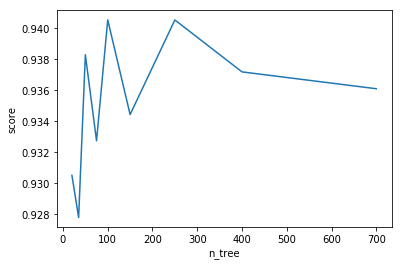

In [24]:
plt.plot(n_tree, accuracy)
plt.xlabel('n_tree')
plt.ylabel('score')
plt.show()

In [25]:
max_features = [5, 10, 20, 30, 40, 50]
accuracy = []
for i in max_features:
    score = cross_val_score(RandomForestClassifier(max_features=i), X, y, cv=5)
    accuracy.append(score.mean())

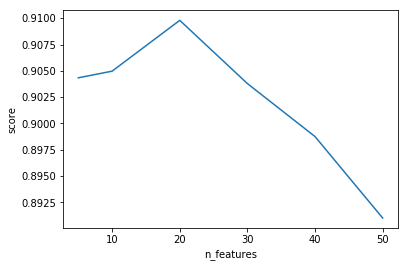

In [26]:
plt.plot(max_features, accuracy)
plt.xlabel('n_features')
plt.ylabel('score')
plt.show()

In [27]:
max_depth = [5, 10, 20, 40, 50, 100]
accuracy = []
for i in max_depth:
    score = cross_val_score(RandomForestClassifier(max_depth=i), X, y, cv=5)
    accuracy.append(score.mean())

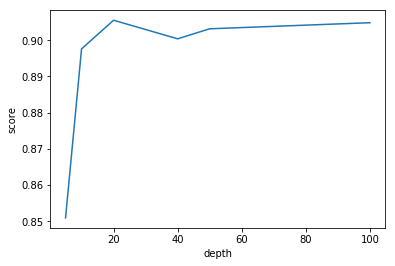

In [28]:
plt.plot(max_depth, accuracy)
plt.xlabel('depth')
plt.ylabel('score')
plt.show()

In [29]:
with(open('ans5.txt', 'w')) as output:
    output.write('2 3 4 7')